In [122]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers, metrics
import ast
import matplotlib.pyplot as plt

In [147]:
df = pd.read_csv('prepared_data/back_2_seconds_accelerometer_only.csv')
df = df.drop(df.columns[0], axis=1)
df

,Category,Accelerometer,Duration
0,CLIMBING,"[[0.7330500483512878, 0.4930500090122223, 10.0...",2
1,CLIMBING,"[[-0.3169500231742859, 1.4239500761032104, 12....",2
2,CLIMBING,"[[0.3540000021457672, 3.427950143814087, 9.400...",2
3,CLIMBING,"[[0.2350500077009201, 3.6130502223968506, 8.53...",2
4,CLIMBING,"[[2.2360501289367676, -0.8350500464439392, 9.6...",2
...,...,...,...
207,DOWNTIME,"[[-5.512950420379639, 7.783050537109375, 1.072...",2
208,DOWNTIME,"[[-5.794950485229492, 7.659000396728516, 0.903...",2
209,DOWNTIME,"[[-5.656050205230713, 7.7470502853393555, 0.90...",2
210,DOWNTIME,"[[-5.664000034332275, 7.711050510406494, 0.691...",2


In [148]:
df = df.sample(frac=1)

In [149]:
# Convert string to list of list of floats
df['Accelerometer'] = df['Accelerometer'].apply(eval)
# df['Gyroscope'] = df['Gyroscope'].apply(eval)
# df['Magnetometer'] = df['Magnetometer'].apply(eval)

In [96]:
df['Accelerometer']

0      [[0.7330500483512878, 0.4930500090122223, 10.0...
1      [[-0.3169500231742859, 1.4239500761032104, 12....
2      [[0.3540000021457672, 3.427950143814087, 9.400...
3      [[0.2350500077009201, 3.6130502223968506, 8.53...
4      [[2.2360501289367676, -0.8350500464439392, 9.6...
                             ...                        
207    [[-5.512950420379639, 7.783050537109375, 1.072...
208    [[-5.794950485229492, 7.659000396728516, 0.903...
209    [[-5.656050205230713, 7.7470502853393555, 0.90...
210    [[-5.664000034332275, 7.711050510406494, 0.691...
211    [[-5.464950084686279, 7.812000274658203, 0.871...
Name: Accelerometer, Length: 212, dtype: object

In [97]:
def check_sublist_lengths(dataframe):
    accelerometer_col = dataframe['Accelerometer']
    for sublist in accelerometer_col:
        for subsublist in sublist:
            if len(subsublist) != 3:
                return False
    return True

In [98]:
print(check_sublist_lengths(df))

True


In [138]:
def remove_rows_by_category(data_frame_input):
    categories_to_remove = ["WALKING"]
    mask = data_frame_input['Category'].isin(categories_to_remove)
    df_filtered = data_frame_input[~mask]
    return df_filtered

In [139]:
df = remove_rows_by_category(df)

In [150]:
df

,Category,Accelerometer,Duration
86,FALLING,"[[-4.780050277709961, 6.909000396728516, 0.280...",2
139,WALKING,"[[-5.818950176239014, 7.015050411224365, 0.414...",2
83,FALLING,"[[-4.22504997253418, 13.642050743103027, 1.675...",2
11,CLIMBING,"[[-6.130050182342529, 6.98805046081543, 2.9569...",2
102,FALLING,"[[-6.469950199127197, 9.604950904846191, 7.594...",2
...,...,...,...
121,WALKING,"[[-5.611050128936768, 6.313050270080566, 2.691...",2
133,WALKING,"[[-3.9180002212524414, 7.831050395965576, 0.19...",2
204,DOWNTIME,"[[-5.836050510406494, 7.527000427246094, 0.955...",2
96,FALLING,"[[-4.464000225067139, 7.303950309753418, 0.249...",2


In [153]:
X_accelerometer = df['Accelerometer']

# Convert 'Accelerometer' column to a 2D NumPy array
X = np.array([np.mean(np.array(sample), axis=0) for sample in X_accelerometer])

# Split data into features (X) and labels (y)
y = df['Category'].values

# Encode labels as numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LSTM model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='softmax')
])
precision = metrics.Precision()

# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=8)

Epoch 1/200


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2604
Epoch 2/200
22/22 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2604
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2604
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2604
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2604
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2604
Epoch 7/200
22/22 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2604
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2604
Epoch 9/200
22/22 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2604
Epoch 10/200
22/22 [==============================] - 0s 2ms/step - loss: 0.0000e+00 

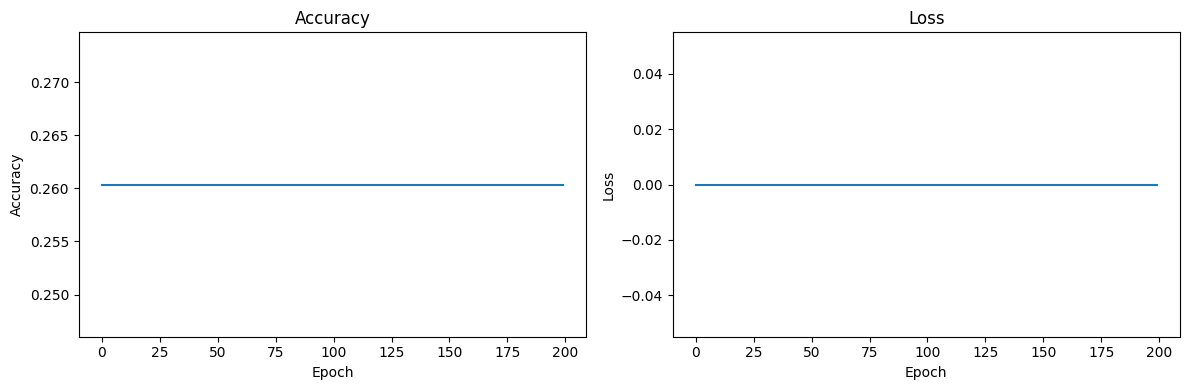

In [154]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [113]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
model.evaluate

2/2 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.3023
Test Loss: 0.0
Test Accuracy: 0.302325576543808


<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x13dbaa750>>